# Task 3 : Car Price Prediction With Machine Learning

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [109]:
df = pd.read_csv('car data.csv')

In [110]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### NULL values checking

In [112]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### Removing duplicate values

In [113]:
df.duplicated().sum()

2

In [114]:
df.drop_duplicates(inplace=True)

##### Car Name has very unique names so we have to remove them from the columns

In [115]:
df.drop(columns=['Car_Name'],inplace=True)

### Exporlation Data Analysis --------------------------------

#### Year data

<Axes: xlabel='Year'>

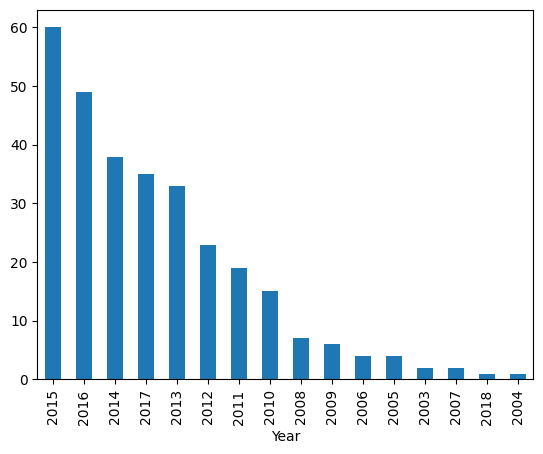

In [116]:
df['Year'].value_counts().plot(kind='bar')

In [117]:
fig = px.bar(df,x='Year',y='Selling_Price',color='Year',title="Year with respect to Selling Price")
# fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

##### Selling Price data

In [118]:
df['Selling_Price'].describe()

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

<Axes: xlabel='Selling_Price'>

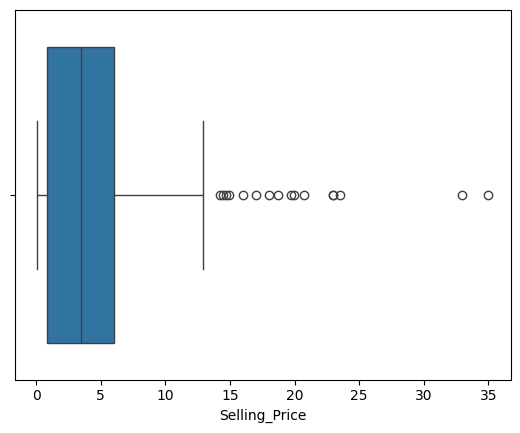

In [119]:
sns.boxplot(df['Selling_Price'],orient='h')

##### Present Price data

In [120]:
df['Present_Price'].describe()

count    299.000000
mean       7.541037
std        8.566332
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
max       92.600000
Name: Present_Price, dtype: float64

<Axes: xlabel='Present_Price'>

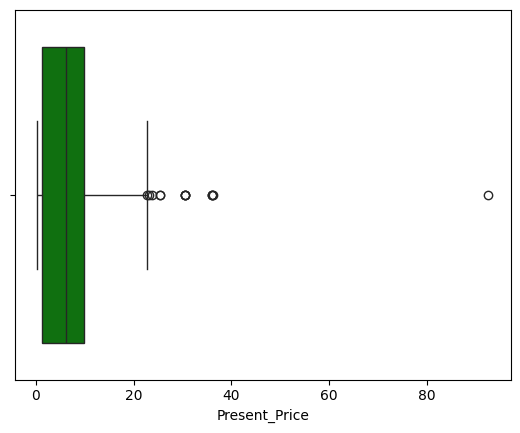

In [121]:
sns.boxplot(df['Present_Price'],orient='h',color='green')

##### Kms Driven Data

In [122]:
df['Driven_kms'].describe()

count       299.000000
mean      36916.752508
std       39015.170352
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48883.500000
max      500000.000000
Name: Driven_kms, dtype: float64

<Axes: xlabel='Driven_kms'>

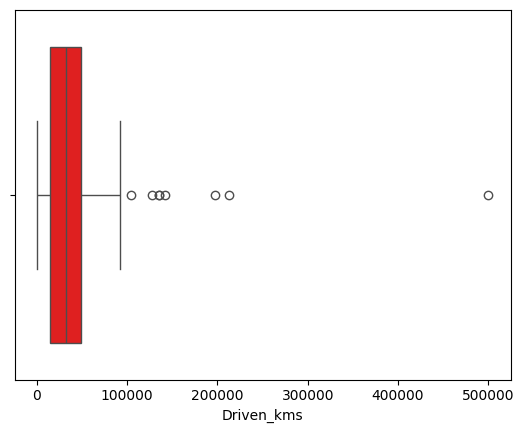

In [123]:
sns.boxplot(df['Driven_kms'],orient='h',color='red')

#### Selling price column handling 

<Axes: xlabel='Selling_type'>

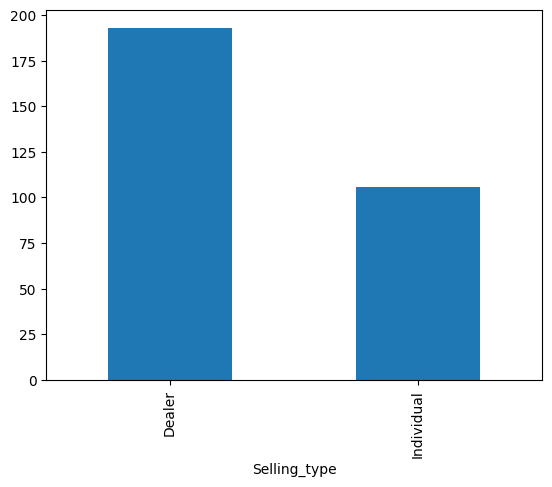

In [124]:
df['Selling_type'].value_counts().plot(kind='bar')

In [125]:
df['dealer'] = df['Selling_type'].apply(lambda x: 1 if x == 'Dealer' else 0)

In [126]:
df.drop(columns='Selling_type',inplace=True)

#### Transmission data

<Axes: xlabel='Transmission'>

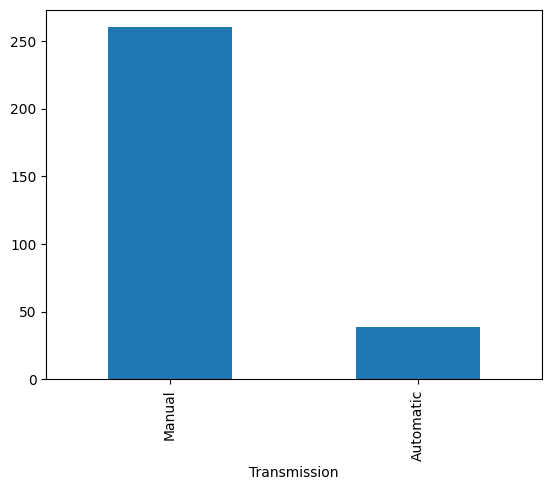

In [127]:
df['Transmission'].value_counts().plot(kind='bar')

In [128]:
df['manual'] = df['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)

In [129]:
df.drop(columns='Transmission',inplace=True)

##### Owner Data

<Axes: xlabel='Owner'>

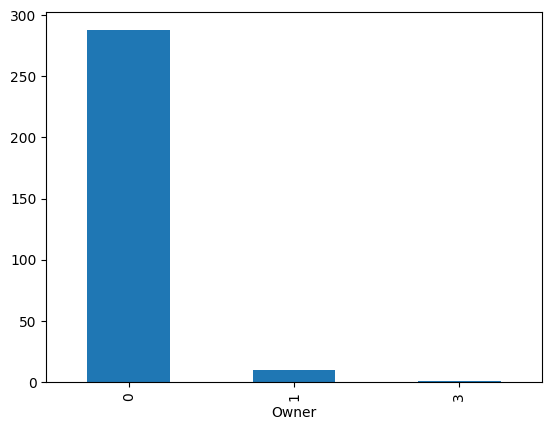

In [130]:
df['Owner'].value_counts().plot(kind='bar')

##### Fuel Type

In [131]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [132]:
df = df[~df['Fuel_Type'].isin(['CNG'])]

In [133]:
df['petrol'] = df['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)

In [134]:
df.drop(columns=['Fuel_Type'],inplace=True)

In [135]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,dealer,manual,petrol
0,2014,3.35,5.59,27000,0,1,1,1
1,2013,4.75,9.54,43000,0,1,1,0
2,2017,7.25,9.85,6900,0,1,1,1
3,2011,2.85,4.15,5200,0,1,1,1
4,2014,4.60,6.87,42450,0,1,1,0


### Pair Plot

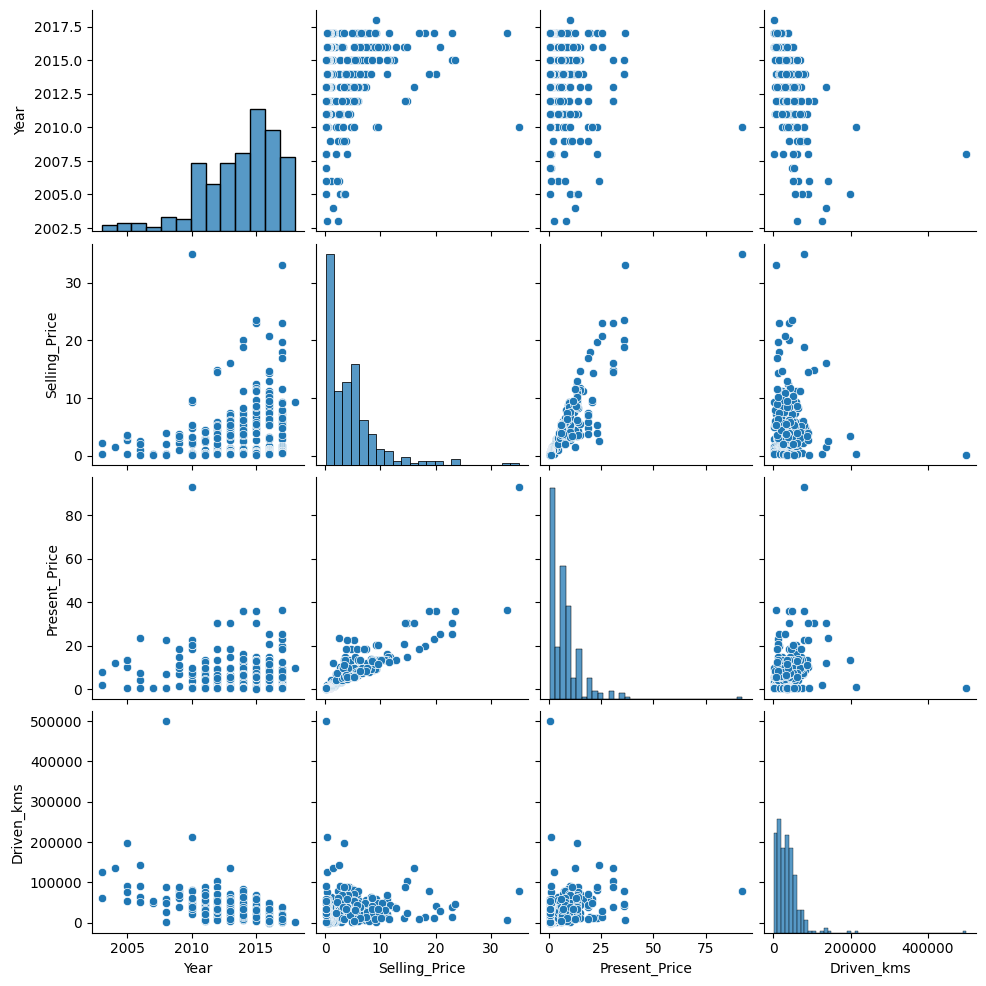

In [136]:
pair_plot_df = df[['Year','Selling_Price','Present_Price','Driven_kms']]

sns.pairplot(pair_plot_df,palette = 'Dark2')

#### Correlation Plot

<Axes: >

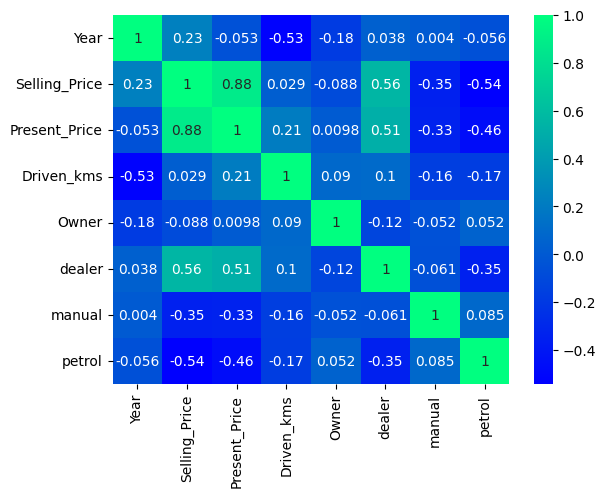

In [137]:
sns.heatmap(df.corr(),annot=True,cmap='winter')

#### As we clearly see that the correlation of selling price with other all the features here owner is very less correlated

Here in the dataset we cannot remove outliers because of very less data if the R2 score compromised then we try to remove outliers

## Apply Machine Learning Algorithms

#### Importing libraries

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

##### We cleary see that in the correlation plot owner has vert less correled to other all the features

In [142]:
X = df.drop(columns=['Selling_Price','Owner'])
y = df['Selling_Price']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [144]:
print(y.mean())
print(y.std())

4.599663299663299
4.999525439077155


#### Linear Regressor

In [145]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(f"The mean squared error of the linear regression: {mean_squared_error(y_test,y_pred)}")
print(f"The r2 score of the linear regression: {r2_score(y_test,y_pred)*100}%")

The mean squared error of the linear regression: 2.3030586733456397
The r2 score of the linear regression: 87.40839381750588%


### Decision Tree Regressor

In [147]:
DT = DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

print(f"The mean squared error of the Decision Tree regression: {mean_squared_error(y_test,y_pred)}")
print(f"The r2 score of the Decision Tree: {r2_score(y_test,y_pred)*100}%")

The mean squared error of the Decision Tree regression: 1.352985
The r2 score of the Decision Tree: 92.60277018211033%


### Random Forest Regressor

In [148]:
Rf = RandomForestRegressor()

Rf.fit(X_train,y_train)

y_pred = Rf.predict(X_test)

print(f"The mean squared error of the Random Forest regression: {mean_squared_error(y_test,y_pred)}")
print(f"The r2 score of the Random Forest Regressor regression: {r2_score(y_test,y_pred)*100}%")

The mean squared error of the Random Forest regression: 0.4538244615000003
The r2 score of the Random Forest Regressor regression: 97.51878709764297%


### Gradient Boost Regressor

In [150]:
Gb = GradientBoostingRegressor()

Gb.fit(X_train,y_train)

y_pred = Gb.predict(X_test)

print(f"The mean squared error of the Gradient Boosting regression: {mean_squared_error(y_test,y_pred)}")
print(f"The r2 score of the Gradient Boosting regression: {r2_score(y_test,y_pred)*100}%")

The mean squared error of the Gradient Boosting regression: 0.4042499429453261
The r2 score of the Gradient Boosting regression: 97.7898278755231%


#### As we can see that Gradient Boost Regression is better than all of them giving best results for the dataset